## Analysis of Unblinded Samples

In [1]:
from PDBPfunctions import *
import upsetplot
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
   # warnings.simplefilter("default")
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

p_dat="/Users/michaelallwright/Documents/python/PDBP/Project Final/data/"
p_unb="/Users/michaelallwright/Documents/python/PDBP/Project Final/data/Post Unblind/"
p_an="/Users/michaelallwright/Documents/python/PDBP/Project Final/analysis/"

/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
A_samps= pd.read_excel ('%s%s' % (p_unb,"NIH PDBP unblinding Group A with disease designation 20-1-20 KHAC.xlsx"), sheet_name='Sheet1')
B_samps= pd.read_excel ('%s%s' % (p_unb,"NIH PDBP unblinding Group B with disease designation 20-1-20 KHAC.xlsx"), sheet_name='Sheet1')

In [9]:
Predictions=pd.read_excel ('%s%s' % (p_unb,"Predictions NIH 20191223.xlsx"), sheet_name='RawData')

In [11]:
correction=pd.read_csv('%s%s' % (p_dat,"SampleBlindLkup.csv"))
Predictions=pd.merge(Predictions,correction,left_on='Sample',right_on='SampleSaid',how='left')
Predictions.head()

,Unnamed: 0,Sample,SampleCrossCheck,Model,probs mean,probs std,Dim Red,PD,Matched Sample,Subject Number,SA Num,SB Num,Set A,key,SampleSaid,SampleAct
0,0,COO6187A01,US80603148_258567810026_S01_GE1_1200_Jun14_1_1,AdaBoost,0.5517,0.147810,UMap,1,NaN,NaN,NaN,NaN,0,nanUMapAdaBoost,COO6187A01,COO6187A01
1,1,COO6187A01,US80603148_258567810026_S01_GE1_1200_Jun14_1_1,Bernoulli NB,0.6925,0.321489,UMap,1,NaN,NaN,NaN,NaN,0,nanUMapBernoulli NB,COO6187A01,COO6187A01
2,2,COO6187A01,US80603148_258567810026_S01_GE1_1200_Jun14_1_1,Decision Tree,0.5888,0.457565,UMap,1,NaN,NaN,NaN,NaN,0,nanUMapDecision Tree,COO6187A01,COO6187A01
3,3,COO6187A01,US80603148_258567810026_S01_GE1_1200_Jun14_1_1,Ensemble,0.6353,0.116204,UMap,1,NaN,NaN,NaN,NaN,0,nanUMapEnsemble,COO6187A01,COO6187A01
4,4,COO6187A01,US80603148_258567810026_S01_GE1_1200_Jun14_1_1,Gauss Proc,0.5309,0.026886,UMap,1,NaN,NaN,NaN,NaN,0,nanUMapGauss Proc,COO6187A01,COO6187A01


In [41]:
Predictions.Sample[(Predictions['SampleSaid']!=Predictions['SampleAct'])].count()/Predictions.Sample.count()

0.8327526132404182

In [42]:
Predictions['Sample']=Predictions['SampleAct']

In [43]:
sub_CO = pd.read_excel ('%s%s' % (p_dat,"PDBP_UNSW_samples Feb 2019.xlsx"), sheet_name='Sheet1')

In [44]:
sample_lkup=sub_CO[["Sample","Sample/Name"]]

In [45]:
A_samps['Set Samp']="A"
B_samps['Set Samp']="B"
Full_samps=pd.concat([A_samps,B_samps])
Full_samps

,Specimen Bar Code,BiosampleCatalogV5.Subject Information.NeuroDiagnosis,Set Samp
0,0001032915,PD,A
1,0001046219,HC,A
2,0001055061,HC,A
3,0001203243,PD,A
4,0002338845,HC,A
...,...,...,...
139,0003711871,PSP,B
140,0003667544,PSP,B
141,PD0022-2894,PSP,B
142,0003704905,PSP,B


In [46]:
Actual=pd.merge(Full_samps,sample_lkup,left_on='Specimen Bar Code',right_on='Sample/Name',how='inner')
Actual=Actual[['Sample','BiosampleCatalogV5.Subject Information.NeuroDiagnosis','Set Samp']]
Actual.columns=['Sample','Diagnosis_Actual','Set Samp']
Actual['Sample']=Actual['Sample'].str.strip()
Actual

,Sample,Diagnosis_Actual,Set Samp
0,COO6187A264,PD,A
1,COO6187A243,HC,A
2,COO6187A184,HC,A
3,COO6187A229,PD,A
4,COO6187A206,HC,A
...,...,...,...
283,COO6187A144,PSP,B
284,COO6187A12,PSP,B
285,COO6187A25,PSP,B
286,COO6187A102,PSP,B


In [47]:
diag_check=pd.merge(Predictions,Actual,on='Sample',how='left')
#diag_check[pd.notnull(diag_check['Diagnosis_Actual'])]

In [48]:
diag_check_HCPD=diag_check#[(diag_check['Diagnosis_Actual']=="HC")|(diag_check['Diagnosis_Actual']=="PD")]
diag_check_HCPD['PD_Act']=0
diag_check_HCPD['PD_Act'][(diag_check['Diagnosis_Actual']=="HC")|(diag_check['Diagnosis_Actual']=="PD")]=1
#diag_check_HCPD

In [49]:
check=diag_check[(diag_check['Diagnosis_Actual']=="HC")|(diag_check['Diagnosis_Actual']!="PD")]

In [50]:
#diag_check_HCPD.groupby('Model')['PD'].value_counts()

In [51]:
diag_check_HCPD[(diag_check_HCPD['Diagnosis_Actual']=="PD")]

,Unnamed: 0,Sample,SampleCrossCheck,Model,probs mean,probs std,Dim Red,PD,Matched Sample,Subject Number,SA Num,SB Num,Set A,key,SampleSaid,SampleAct,Diagnosis_Actual,Set Samp,PD_Act
17,17,COO6187A02,US80603148_258567810026_S01_GE1_1200_Jun14_1_2,AdaBoost,0.5245,0.151379,UMap,1,COO6187A256,ST-00016228,2.0,256.0,0,2.0UMapAdaBoost,COO6187A02,COO6187A02,PD,B,1
18,18,COO6187A02,US80603148_258567810026_S01_GE1_1200_Jun14_1_2,Bernoulli NB,0.5811,0.369678,UMap,1,COO6187A256,ST-00016228,2.0,256.0,0,2.0UMapBernoulli NB,COO6187A02,COO6187A02,PD,B,1
19,19,COO6187A02,US80603148_258567810026_S01_GE1_1200_Jun14_1_2,Decision Tree,0.5245,0.450076,UMap,1,COO6187A256,ST-00016228,2.0,256.0,0,2.0UMapDecision Tree,COO6187A02,COO6187A02,PD,B,1
20,20,COO6187A02,US80603148_258567810026_S01_GE1_1200_Jun14_1_2,Ensemble,0.5235,0.141323,UMap,1,COO6187A256,ST-00016228,2.0,256.0,0,2.0UMapEnsemble,COO6187A02,COO6187A02,PD,B,1
21,21,COO6187A02,US80603148_258567810026_S01_GE1_1200_Jun14_1_2,Gauss Proc,0.5027,0.021274,UMap,1,COO6187A256,ST-00016228,2.0,256.0,0,2.0UMapGauss Proc,COO6187A02,COO6187A02,PD,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,9753,COO6187A94,US80603148_258567810034_S01_GE1_1200_Jun14_2_2,SGD,0.6000,0.502625,None,1,NaN,NaN,NaN,NaN,0,nanNoneSGD,COO6187A95,COO6187A94,PD,B,1
9754,9754,COO6187A94,US80603148_258567810034_S01_GE1_1200_Jun14_2_2,XGB_gs1,0.7223,0.000000,None,1,NaN,NaN,NaN,NaN,0,nanNoneXGB_gs1,COO6187A95,COO6187A94,PD,B,1
9755,9755,COO6187A94,US80603148_258567810034_S01_GE1_1200_Jun14_2_2,XGB_gs2,0.6583,0.000000,None,1,NaN,NaN,NaN,NaN,0,nanNoneXGB_gs2,COO6187A95,COO6187A94,PD,B,1
9756,9756,COO6187A94,US80603148_258567810034_S01_GE1_1200_Jun14_2_2,XGB_gs3,0.8942,0.000000,None,1,NaN,NaN,NaN,NaN,0,nanNoneXGB_gs3,COO6187A95,COO6187A94,PD,B,1


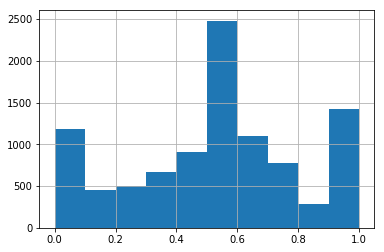

In [52]:
diag_check_HCPD['probs mean'].hist(bins=10)
plt.show()

In [53]:
diag_check_HCPD['recs']=1
diag_check_HCPD['Correct']=0
diag_check_HCPD['Correct'][(diag_check_HCPD['PD']==diag_check_HCPD['PD_Act'])]=1

In [54]:
diag_check_HCPD['Correct'].sum()/diag_check_HCPD['recs'].sum()

0.49142156862745096

In [55]:
#diag_check_HCPD[(diag_check_HCPD['Model']=="Gauss Proc")&(diag_check_HCPD['Dim Red']=="None")]

In [56]:
#diag_check_summary=pd.DataFrame(diag_check_HCPD.groupby(['Dim Red','Model','Set Samp'])['Correct','recs'].sum()).reset_index()
diag_check_summary=pd.DataFrame(diag_check_HCPD.groupby(['Dim Red','Model'])['Correct','recs'].sum()).reset_index()

#diag_check_summary=pd.DataFrame(diag_check_HCPD[(diag_check_HCPD['PD_Act']==0)].groupby(['Dim Red','Model'])['Correct','recs'].sum()).reset_index()

#diag_check_summary.columns=['Dim Red','Model','Set Samp','Correct','recs']
diag_check_summary.columns=['Dim Red','Model','Correct','recs']
diag_check_summary['corr_rate']=diag_check_summary['Correct']/diag_check_summary['recs']
diag_check_summary.sort_values(by="corr_rate",ascending=False)

,Dim Red,Model,Correct,recs,corr_rate
5,None,KNN,166,288,0.576389
6,None,Linear SVM,155,288,0.538194
25,UMap,Naive Bayes,153,288,0.531250
18,UMap,Bernoulli NB,153,288,0.531250
22,UMap,KNN,153,288,0.531250
23,UMap,Linear SVM,153,288,0.531250
29,UMap,SGD,153,288,0.531250
20,UMap,Ensemble,153,288,0.531250
24,UMap,Log Reg,153,288,0.531250
26,UMap,Neural Net,153,288,0.531250


In [32]:
A_actual['Sample']

0      COO6187A264 
1      COO6187A243 
2      COO6187A184 
3      COO6187A229 
4      COO6187A206 
           ...     
139    COO6187A153 
140    COO6187A239 
141    COO6187A273 
142    COO6187A165 
143    COO6187A190 
Name: Sample, Length: 144, dtype: object

In [35]:
A_actual[(A_actual['Sample'].str.strip()=="COO6187A264")]

,Sample,Diagnosis_Actual
0,COO6187A264,PD


In [30]:
Predictions.sample(20)

,Unnamed: 0,Sample,SampleCrossCheck,Model,probs mean,probs std,Dim Red,PD,Matched Sample,Subject Number,SA Num,SB Num,Set A,key
8820,8820,COO6187A39,US80603148_258567810004_S01_GE1_1200_Jun14_2_3,XGB_gs2,0.4688,0.000000e+00,None,0,COO6187A231,ST-00017117,39.0,231.0,0,39.0NoneXGB_gs2
4251,4251,COO6187A60,US80603148_258567810035_S01_GE1_1200_Jun14_1_3,Bernoulli NB,0.9122,1.772130e-01,UMap,1,COO6187A257,ST-00016697,60.0,257.0,0,60.0UMapBernoulli NB
3576,3576,COO6187A28,US80603148_258567810001_S01_GE1_1200_Jun14_1_4,Linear SVM,0.6257,4.743186e-02,UMap,1,COO6187A162,ST-00016705,28.0,162.0,0,28.0UMapLinear SVM
2002,2002,COO6187A195,US80603148_258567810015_S01_GE1_1200_Jun14_1_2,XGB_gs1,0.5340,1.211897e-01,UMap,1,COO6187A43,ST-00016448,195.0,43.0,1,195.0UMapXGB_gs1
267,267,COO6187A102,US80603148_258567810003_S01_GE1_1200_Jun14_2_1,SGD,0.2800,4.535574e-01,UMap,0,NaN,NaN,NaN,NaN,0,nanUMapSGD
1807,1807,COO6187A185,US80603148_258567810020_S01_GE1_1200_Jun14_2_4,KNN,0.0971,8.384750e-02,UMap,0,COO6187A62,ST-00016292,185.0,62.0,1,185.0UMapKNN
2491,2491,COO6187A221,US80603148_258567810017_S01_GE1_1200_Jun14_1_4,Neural Net,0.5493,1.299618e-01,UMap,1,COO6187A51,ST-00017136,221.0,51.0,1,221.0UMapNeural Net
1912,1912,COO6187A190,US80603148_258567810028_S01_GE1_1200_Jun14_2_1,Naive Bayes,0.9949,1.432585e-02,UMap,1,NaN,NaN,NaN,NaN,0,nanUMapNaive Bayes
4620,4620,COO6187A81,US80603148_258567810009_S01_GE1_1200_Jun14_2_4,XGB_gs1,0.2801,6.669816e-02,UMap,0,COO6187A243,ST-00016257,81.0,243.0,0,81.0UMapXGB_gs1
4191,4191,COO6187A56,US80603148_258567810022_S01_GE1_1200_Jun14_2_3,Neural Net,0.5438,1.378990e-01,UMap,1,COO6187A214,ST-00016865,56.0,214.0,0,56.0UMapNeural Net
